**Incendios forestales estadísticos del Departamento Forestal de Oregón desde 2000 hasta 2022**

---
ABSTRACT

Las zonas forestales son imprescindibles para la vida en el planeta. Además de ser parte fundamental en los ciclos de producción y distribución del agua, purifican el aire que respiramos al capturar bióxido de carbono y liberar oxígeno. También regulan la temperatura y la humedad, con lo que se equilibra el clima; proporcionan alimento, medicina y refugio a los seres vivos; y son fuente de materia prima en muchas actividades humanas. Estos procesos vitales se ven amenazados por diversos factores ajenos a las actividades forestales como: la degradación de suelos, la deforestación, la tala inmoderada, los fuegos no controlados que están relacionados con otras actividades como la agricultura, la ganadería y el desarrollo urbano. El fuego puede tener una influencia positiva en la naturaleza, pues ayuda a mantener la biodiversidad. Pero cuando se utiliza de forma irresponsable o se produce por alguna negligencia, puede convertirse en un incendio forestal de consecuencias devastadoras para el medio ambiente, incluso para la salud y seguridad de las personas.


*MOTIVACIÓN*

Considerando los impactos significativos de los incendios forestales en paisajes y ecosistemas circundantes, las percepciones obtenidas de este análisis se utilizarán para informar y mejorar las estrategias futuras epartamento Forestal de Oregon en materia de prevención de incendios.

*OBJETIVO*

El objetivo principal es identificar los impulsores clave detrás del aumento en la gravedad y la frecuencia de los incendios forestales. Utilizando la regresión logística, ver si es posible desarrollar un modelo de alarma predictiva que proporcione advertencias oportunas cuando la probabilidad de que ocurra un incendio forestal sea alta.

- Contexto comercial: El Departamente Forestal de Oregon es el encargado de prevenir, atender y remediar los incendios forestales producidos en el territorio correspondiente a su Estado. Es por eso que buscamos brindarles información y herramientas que les permitan mejorar su labor y disminuir los incendios forestales ocasionados.
- Problema comercial: El problema comercial es el deseo de prevenir los incendios. Por eso es necesario conocer las causas, las zonas más susceptibles, y los factores que pueden incrementar las probabilidades de ocurrencia de los mismos.
- Contexto analítico: Tenemos acceso a dos datasets. Se realizará un analisis de datos que permita explorar las tendencias de incendios forestales en los condados de Oregón desde 2000 hasta 2022, centrándose en factores como la frecuencia de incendios, acres quemados, ubicación de los incendios y causalidad. Además, se investigará la correlación entre estos patrones de incendios forestales y datos meteorológicos, con un enfoque específico en la temperatura promedio diaria y la precipitación.

*DATOS DE INCENDIOS FORESTALES*

Incluyen el número de serie, la categoría del incendio, el año en que ocurrió, la ubicación del incendio (latitud y longitud) y la causa del incendio (humano o rayo y las causas generales y específicas). Los datos también incluyen información sobre el área del incendio, el nombre del distrito y la unidad, el nombre del incendio, el tamaño, los acres protegidos y la fecha y hora de la ignición, el informe, el descubrimiento, el control, la creación y la modificación. Otros campos incluyen información sobre el tipo de propiedad de la tierra, el municipio, el rango, la sección, la subdivisión, la ubicación del punto de referencia, el condado, las restricciones de uso de la tierra y los códigos de distrito y unidad de incendios.

*DATOS METEREOLOGICOS*

El conjunto de datos meteorológicos consta de más de 305,000 filas, abarcando cada día desde 2000 hasta 2022. Estas variables meteorológicas se combinaron con los datos de incendios forestales de ODF - utilizando 'Condado' y 'Fecha' como identificadores comunes - para analizar la relación entre los patrones de incendios forestales y las condiciones meteorológicas diarias. Las columnas extra de este dataset incluyen:
prcp = Precipitación (mm)
tavg = Temperatura promedio (°C), calculada como el promedio de TMAX y TMIN
tmax = Temperatura máxima diaria (°C)
tmin = Temperatura mínima diaria (°C)

*LIMITACIONES*

Hay muchas variables que no están incluidas en este conjunto de datos y que pueden influir en los eventos de incendios forestales, como el viento, la humedad y el tipo de combustible. Esto probablemente dificultará la creación de un modelo predictivo preciso.

***Preguntas e hipótesis a abordar en el analisis de datos***

1) ¿Cuáles son los incendios más grandes de la historia de Oregon?
Hipotesis nula: Todos los incendios tienen una proporción similar.
Hipótesis alternativa: Existen incendios de proporciones significativamente mayores.
2) ¿Cómo varió la generación de incendios a lo largo de los años?
Hipótesis nula: El número de incendios se mantuvo constante a lo largo de los años.
Hipotesis alternativa: El número de incendios muestra una tendencia marcada a lo largo de los años.
3) ¿En qué regiones de Oregon predominaron los incendios?
Hipótesis nula: La cantidad de indencios es independiente de la región estudiada.
Hipótesis alternativa: La cantidad de incendios depende de la región estudiada.
4) ¿Cuales son los condados de Oregon más afectados por los incendios?
Hipótesis nula: Todos los condados de Oregon fueron afectados por igual.
Hipótesis alternativa: Existen condados con una cantidad de incendios significativamente mayor que otros.

**EDA (Exploratory Data Analysis)**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Datasets/DATASET3'
df = pd.read_csv('fire-occurence.csv', sep=',')
df.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Datasets/DATASET3


,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [54]:
print('Nombre columnas:',df.columns)
df.info()

Nombre columnas: Index(['Serial', 'FireCategory', 'FireYear', 'Area', 'DistrictName',
       'UnitName', 'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial                  23490 non-null  int64  
 1   FireCategory            23490 non-null  object 
 2   FireYear

In [55]:
df.describe()

,Serial,FireYear,EstTotalAcres,Protected_Acres,Lat_DD,Long_DD,Sec,DistrictCode,UnitCode
count,23490.000000,23490.00000,23411.000000,23490.000000,23480.000000,23480.000000,23478.000000,23490.000000,23490.000000
mean,90425.933461,2010.80132,270.802503,63.454008,43.718410,-122.258736,18.576753,77.754662,779.371052
std,20901.016028,6.73508,6816.736966,1973.577812,1.226385,1.707589,10.439507,14.618857,146.534574
min,57485.000000,2000.00000,0.000000,0.000000,41.089460,-124.983610,1.000000,51.000000,511.000000
25%,72508.500000,2005.00000,0.010000,0.010000,42.526093,-123.387420,10.000000,71.000000,711.000000
50%,88340.000000,2011.00000,0.100000,0.100000,43.581805,-122.847220,19.000000,73.000000,732.000000
75%,107432.500000,2017.00000,0.500000,0.350000,44.789518,-121.541827,28.000000,95.000000,954.000000
max,134021.000000,2022.00000,499945.000000,154570.000000,46.235000,-116.521110,36.000000,99.000000,991.000000


In [56]:
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Datasets/DATASET4'
df_clima = pd.read_csv('Wildfire_Weather_Merged_new.csv', sep=',')
df_clima.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Datasets/DATASET4


<ipython-input-56-b7ffd4cff118>:4: DtypeWarning: Columns (21,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clima = pd.read_csv('Wildfire_Weather_Merged_new.csv', sep=',')


,Date,County,tmax,tmin,tavg,prcp,Year,Serial,FireCategory,Area,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,FireEvent
0,2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [57]:
print('Nombre columnas:',df_clima.columns)
df_clima.info()

Nombre columnas: Index(['Date', 'County', 'tmax', 'tmin', 'tavg', 'prcp', 'Year', 'Serial',
       'FireCategory', 'Area', 'DistrictName', 'UnitName', 'FullFireNumber',
       'FireName', 'Size_class', 'EstTotalAcres', 'Protected_Acres',
       'HumanOrLightning', 'CauseBy', 'GeneralCause', 'SpecificCause',
       'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD', 'FO_LandOwnType',
       'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation', 'RegUseZone',
       'RegUseRestriction', 'Industrial_Restriction', 'Ign_DateTime',
       'ReportDateTime', 'Discover_DateTime', 'Control_DateTime',
       'CreationDate', 'ModifiedDate', 'DistrictCode', 'UnitCode',
       'DistFireNumber', 'FireEvent'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309512 entries, 0 to 309511
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    309512 non-null  object 
 1   

In [58]:
df_clima.describe()

,tmax,tmin,tavg,prcp,Year,Serial,EstTotalAcres,Protected_Acres,Lat_DD,Long_DD,Sec,DistrictCode,UnitCode,FireEvent
count,309512.000000,309512.000000,309512.000000,309512.000000,309512.000000,23472.000000,23396.000000,23472.000000,23466.000000,23466.000000,23462.000000,23472.000000,23472.000000,309512.000000
mean,15.783918,3.819559,9.801738,2.885612,2010.988676,90418.201304,252.722636,58.129721,43.717938,-122.260443,18.578638,77.750852,779.332353,0.075836
std,9.205315,6.163994,7.456448,6.666913,6.635189,20898.527341,6668.023401,1845.078523,1.225580,1.705490,10.439685,14.617777,146.522975,0.264735
min,-14.260000,-26.670000,-19.470000,0.000000,2000.000000,57485.000000,0.000000,0.000000,41.996940,-124.983610,1.000000,51.000000,511.000000,0.000000
25%,8.520000,-0.320000,4.300000,0.000000,2005.000000,72507.750000,0.010000,0.010000,42.526128,-123.387667,10.000000,71.000000,711.000000,0.000000
50%,14.710000,3.830000,9.250000,0.030000,2011.000000,88319.500000,0.100000,0.100000,43.581390,-122.848160,19.000000,73.000000,732.000000,0.000000
75%,23.250000,8.500000,15.720000,2.650000,2017.000000,107417.250000,0.500000,0.350000,44.789017,-121.543060,28.000000,95.000000,954.000000,0.000000
max,44.600000,22.930000,33.320000,163.170000,2022.000000,134021.000000,499945.000000,154570.000000,46.235000,-116.521110,36.000000,99.000000,991.000000,1.000000


In [59]:
#Chequeando duplicados
df_clima.duplicated().sum()


0

In [60]:
df_clima.dtypes

Date                       object
County                     object
tmax                      float64
tmin                      float64
tavg                      float64
prcp                      float64
Year                        int64
Serial                    float64
FireCategory               object
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv        

In [61]:
#Convertir los datos de fecha
cols_to_convert = ['ReportDateTime', 'Control_DateTime', 'Date']
df_clima[cols_to_convert] = df_clima[cols_to_convert].apply(pd.to_datetime)

In [62]:
#Colocamos la columna de datos de fecha como indice del DataFrame
df_clima.set_index('Date', inplace=True)

In [63]:
#Creanmos nuevas columnas en el DataFrame df_clima para representar el mes y la estación, convirtiéndolos en variables numéricas y eliminando las columnas originales
df_clima['Month'] = df_clima.index.strftime('%B')
df_clima['Season'] = pd.cut(df_clima.index.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])


#Actualizar las nuevas columnas a variables numéricas y eliminar las variables que agregamos inicialmente
months_dummies = pd.get_dummies(df_clima['Month'])
df_clima = pd.concat([df_clima, months_dummies], axis=1)

season_dummies = pd.get_dummies(df_clima['Season'])
df_clima = pd.concat([df_clima, season_dummies], axis=1)

df_clima.drop(columns=['Month', 'Season'], inplace=True)

In [64]:

#Calcular y agregar una nueva columna para la duración del Incendio (en horas)
df_clima['FireDuration_hrs'] = (df_clima['Control_DateTime'] - df_clima['ReportDateTime']).dt.total_seconds() / 3600

In [65]:

#Crear un nuevo DataFrame para cuando ocurrió un incendio forestal (fire_event = 1)
df_fire = df_clima[df_clima['FireEvent']== 1]

In [66]:
#En el siguiente paso, identificaremos los valores nulos en el DataFrame df_fire (donde ocurrieron incendios forestales)
#Determinaremos cómo manejarlos. También eliminaremos las columnas que no son necesarias para este análisis.
df_fire.isnull().sum().sort_values(ascending=False)

Cause_Comments            13672
LandmarkLocation           1280
SpecificCause               221
CauseBy                     125
FireDuration_hrs             92
Control_DateTime             92
Discover_DateTime            91
Ign_DateTime                 91
Industrial_Restriction       85
RegUseRestriction            85
EstTotalAcres                76
RegUseZone                   46
Subdiv                       29
Rng                          13
Twn                          10
Sec                          10
Lat_DD                        6
Long_DD                       6
LatLongDD                     6
CreationDate                  3
FireEvent                     0
April                         0
August                        0
December                      0
February                      0
March                         0
July                          0
June                          0
January                       0
FireName                      0
UnitCode                      0
May     


Hay más de 13,000 valores nulos en la columna 'Cause_Comments', por lo que no la utilizaremos en nuestro análisis. Nuestro enfoque principal para revisar la causalidad será examinar 'GeneralCause', ya que no hay valores nulos presentes. En cuanto a la fecha del incendio, nos centraremos en 'ReportDateTime', ya que no hay valores faltantes. Esta es la fecha en que se informó por primera vez el incendio.

In [67]:
#La ubicación precisa es importante para este análisis, por lo que eliminaremos las 6 filas con valores NA de las columnas de latitud y longitud
df_fire = df_fire.dropna(subset=['Lat_DD', 'Long_DD', 'LatLongDD'])

In [68]:
count_removed = len(df_fire[(df_fire['EstTotalAcres'].isna()) & (df_fire['Protected_Acres'] == 0.00)])
print("Count of rows to be removed:", count_removed)

# Aquí eliminaremos (21) filas con valores NaN para 'EstTotalAcres' y '0.00' acres protegidos quemados.
# Estos eventos de incendio no contienen datos de acres quemados, por lo que no serán útiles en este análisis, ya que no conocemos el tamaño.

df_fire = df_fire.loc[~((df_fire['EstTotalAcres'].isna()) & (df_fire['Protected_Acres'] == 0.00))]


Count of rows to be removed: 21


In [69]:
# Eliminar filas que no utilizaremos en este análisis

df_fire = df_fire.drop(columns=['Serial', 'Cause_Comments', 'LandmarkLocation', 'Twn', 'Discover_DateTime',
                                'RegUseRestriction', 'Ign_DateTime', 'CreationDate', 'ModifiedDate', 'UnitName'], axis=1)


In [70]:
df_fire.describe()

,tmax,tmin,tavg,prcp,Year,EstTotalAcres,Protected_Acres,Lat_DD,Long_DD,Sec,...,March,May,November,October,September,Winter,Spring,Summer,Fall,FireDuration_hrs
count,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23394.000000,23445.00000,23445.000000,23445.000000,23437.000000,...,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23445.000000,23380.000000
mean,25.429733,9.335433,17.382570,0.546488,2010.792536,252.740395,58.19280,43.718109,-122.261007,18.578444,...,0.011900,0.065344,0.016635,0.072467,0.143613,0.018298,0.209085,0.680870,0.091747,105.030634
std,6.362628,4.627237,5.290873,2.118167,6.733485,6668.308149,1846.13966,1.226102,1.706132,10.437664,...,0.108439,0.247138,0.127901,0.259266,0.350704,0.134030,0.406664,0.466149,0.288674,4413.017574
min,-2.630000,-17.790000,-8.800000,0.000000,2000.000000,0.000000,0.00000,41.996940,-124.983610,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-61337.216667
25%,21.730000,6.780000,14.380000,0.000000,2005.000000,0.010000,0.01000,42.525950,-123.388060,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333
50%,26.300000,9.920000,18.040000,0.000000,2011.000000,0.100000,0.10000,43.582220,-122.848890,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.183333
75%,30.110000,12.470000,21.140000,0.030000,2017.000000,0.500000,0.35000,44.789480,-121.543060,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.704167
max,41.860000,21.660000,31.440000,61.990000,2022.000000,499945.000000,154570.00000,46.235000,-116.521110,36.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,578573.133333


Un valor máximo de duracion del incendio (Fire_Duration) de más de 500,000 horas no parece plausible, y no debería haber valores negativos. Eliminaremos estos valores inexactos.

In [71]:
#Filtrar valores extremos en Fire_Duration. Estos se establecerán como valores NaN en lugar de eliminar cada fila.

umbral = 4000  #Umbral máximo de duración en horas (~ 6 meses). Cualquier valor superior a 6 meses se cambiará a NaN

df_fire = df_fire.copy()
df_fire.loc[(df_fire['FireDuration_hrs'] < 0) | (df_fire['FireDuration_hrs'] > umbral), 'FireDuration_hrs'] = np.nan


Se generarán cuatro gráficos de caja para visualizar la distribución de las variables 'EstTotalAcres' (Superficie Total Estimada), 'FireDuration_hrs' (Duración del Incendio en horas), 'prcp' (Precipitación en mm) y 'tavg' (Temperatura Promedio en °C). Este tipo de gráfico ayuda a identificar la presencia de valores atípicos y la distribución general de los datos en cada variable.

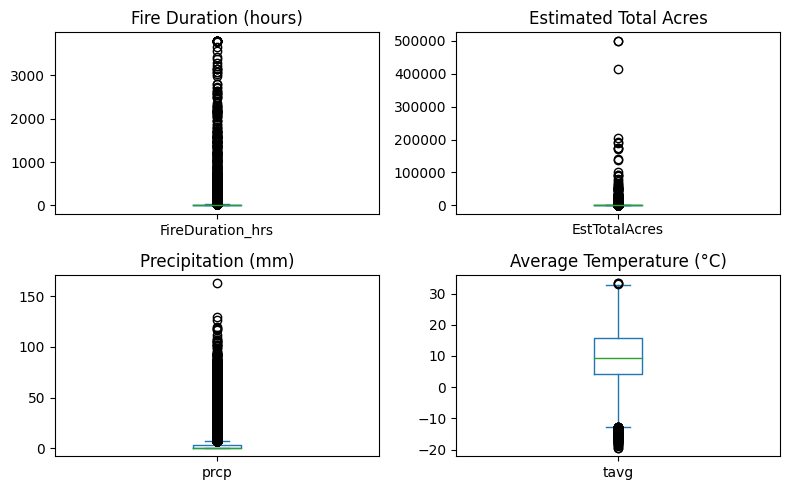

In [72]:
#Verificar cualquier anormalidad en la distribución con variables: duración del incendio, superficie, precipitación, temperatura

fig, axes = plt.subplots(2, 2, figsize=(8, 5))

#Gráficos de caja para 'FireDuration', 'EstTotalAcres', 'prcp' y 'tavg' en subgráficos separados debido a las grandes variaciones en los rangos de valores.
df_fire['EstTotalAcres'].plot(kind='box', ax=axes[0, 1], title='Estimated Total Acres')
df_fire['FireDuration_hrs'].plot(kind='box', ax=axes[0, 0], title='Fire Duration (hours)')
df_clima['prcp'].plot(kind='box', ax=axes[1, 0], title='Precipitation (mm)')
df_clima['tavg'].plot(kind='box', ax=axes[1, 1], title='Average Temperature (°C)')

plt.tight_layout()
plt.show()


Basándonos en los gráficos de caja anteriores, es evidente que la mayoría de los incendios son relativamente pequeños en tamaño, con una mediana de 0.1 acres, y como resultado, tienden a arder durante un corto período de tiempo, con una mediana de aproximadamente 2 horas. Además, los valores de precipitación indican que una parte significativa de los días (75%) tuvo muy poca o ninguna precipitación registrada.

A continuación ordenamos el DataFrame df_fire según la columna 'EstTotalAcres' de manera descendente (mayor a menor) y luego seleccionamos las primeras 10 filas para obtener los 10 incendios más grandes. El resultado se almacena en el DataFrame top_10 y se imprime en la salida para mostrar las primeras 10 filas de este conjunto de datos ordenado.

In [73]:
#Determinar los 10 incendios más grandes

df_sorted = df_fire.sort_values('EstTotalAcres', ascending=False)
top_10 = df_sorted.head(10)
top_10.head(10)


,County,tmax,tmin,tavg,prcp,Year,FireCategory,Area,DistrictName,FullFireNumber,...,March,May,November,October,September,Winter,Spring,Summer,Fall,FireDuration_hrs
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-15,Josephine,27.33,9.96,18.64,0.0,2002,STAT,SOA,Coos - CFPA,02-723024-03,...,0,0,0,0,0,0,0,1,0,2789.766667
2002-07-15,Josephine,27.33,9.96,18.64,0.0,2002,STAT,SOA,Southwest Oregon,02-712061-03,...,0,0,0,0,0,0,0,1,0,2789.766667
2021-07-06,Klamath,31.90,10.48,21.19,0.0,2021,STAT,EOA,Klamath-Lake,21-981005-22,...,0,0,0,0,0,0,0,1,0,3571.783333
2020-08-16,Marion,35.61,14.78,25.19,0.0,2020,STAT,NOA,North Cascade,20-582028-21,...,0,0,0,0,0,0,0,1,0,2113.016667
2020-08-16,Marion,35.61,14.78,25.19,0.0,2020,STAT,NOA,North Cascade,20-582027-21,...,0,0,0,0,0,0,0,1,0,3282.000000
2017-07-12,Curry,26.36,10.10,18.23,0.0,2017,STAT,SOA,Coos - CFPA,17-723063-18,...,0,0,0,0,0,0,0,1,0,2710.283333
2018-07-15,Curry,30.37,16.25,23.31,0.0,2018,STAT,SOA,Coos - CFPA,18-723035-19,...,0,0,0,0,0,0,0,1,0,2742.250000
2020-09-07,Lane,30.26,11.15,20.71,0.0,2020,STAT,SOA,South Cascade,20-771088-21,...,0,0,0,0,1,0,0,1,0,NaN
2022-08-30,Wallowa,28.63,8.23,18.43,0.0,2022,STAT,EOA,Northeast Oregon,22-974032-23,...,0,0,0,0,0,0,0,1,0,NaN



El Incendio Biscuit es el incendio más grande jamás registrado en Oregón, consumiendo casi medio millón de acres de tierra en el condado de Josephine en julio de 2002. El Incendio Biscuit aparece dos veces en este conjunto de datos, así que eliminaremos uno de los duplicados (ODF / Biscuit).

In [74]:
df_fire = df_fire[df_fire['FireName'] != 'ODF / BISCUIT']

INSIGHTS

Una vez realizada la primera exploración de los datos y la limpieza del dataset correspondiente a datos meteorológicos, surge la incognita de si - con el trabajo del Departamento Forestal de Oregon - la cantidad de incendios generado ha logrado disminuirse.

<ipython-input-75-66d7f6a1df29>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_totales = df.groupby(['FireYear']).sum().unstack()


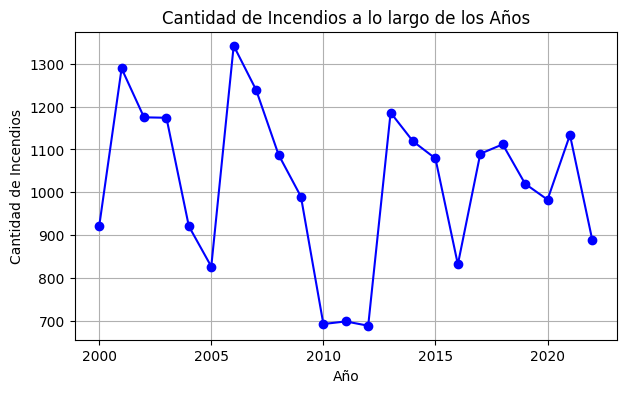

In [75]:
df_totales = df.groupby(['FireYear']).sum().unstack()
# Asegurar que la columna 'FireYear' sea numérica
df['FireYear'] = pd.to_numeric(df['FireYear'], errors='coerce')

# Agrupa por año y cuenta la cantidad de incendios (Serial)
incendios_por_anio = df.groupby('FireYear')['Serial'].count().reset_index()

# Crea un gráfico de líneas
plt.figure(figsize=(7, 4))
plt.plot(incendios_por_anio['FireYear'], incendios_por_anio['Serial'], marker='o', linestyle='-', color='b')

# Personaliza el gráfico
plt.title('Cantidad de Incendios a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Incendios')
plt.grid(True)
plt.show()

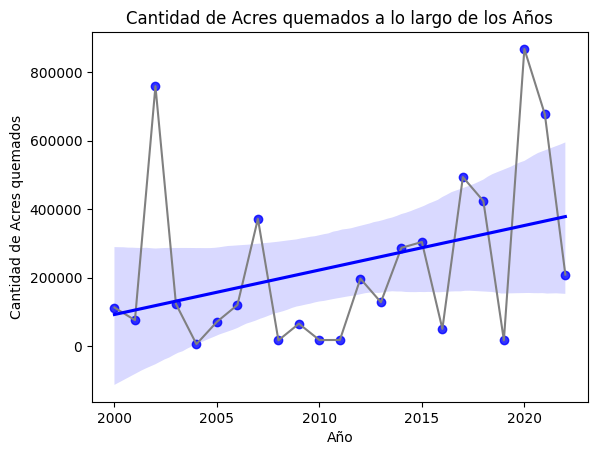

In [76]:
df_group = df_fire.groupby('Year')['EstTotalAcres'].sum()
sns.lineplot(x=df_group.index, y=df_group.values, color='grey')
sns.regplot(x=df_group.index, y=df_group.values, color='blue')
plt.title('Cantidad de Acres quemados a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Acres quemados')
plt.show()

El año más devastador para los incendios forestales fue 2020, con más de 867.000 acres quemados.

La cantidad de acres quemados ha mostrado una tendencia ascendente desde el año 2000, aunque el número real de eventos de incendios forestales ha disminuido, lo que indica que la intensidad y duración de los incendios forestales están aumentando en lugar del número.

La disminución en la frecuencia de incendios forestales podría atribuirse a los esfuerzos mejorados de prevención y mitigación de incendios. Sin embargo, es importante tener en cuenta que el aumento en la gravedad puede estar influenciado por factores como el manejo inadecuado de áreas forestales.

¿En qué regiones de Oregon predominan los incendios?

<Figure size 800x400 with 0 Axes>

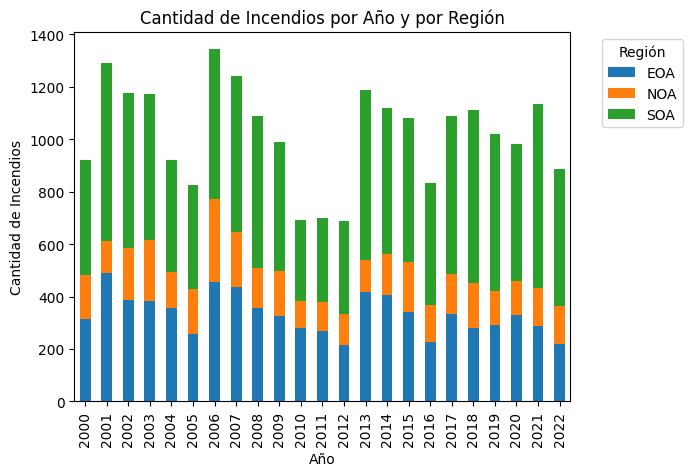

In [77]:
# Agrupar por año y región, contar la cantidad de incendios
incendios_por_anio_region = df.groupby(['FireYear', 'Area']).size().unstack()

# Crear un gráfico de barras agrupado usando Matplotlib
plt.figure(figsize=(8, 4))
incendios_por_anio_region.plot(kind='bar', stacked=True)

# Añadir título y etiquetas
plt.title('Cantidad de Incendios por Año y por Región')
plt.xlabel('Año')
plt.ylabel('Cantidad de Incendios')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Con este grafico se puede ver que los incendios se suceden con una frecuencia superior en la región SOA > EOA > NOA.

¿Cuáles son los condados de Oregón más afectados por los incendios forestales?

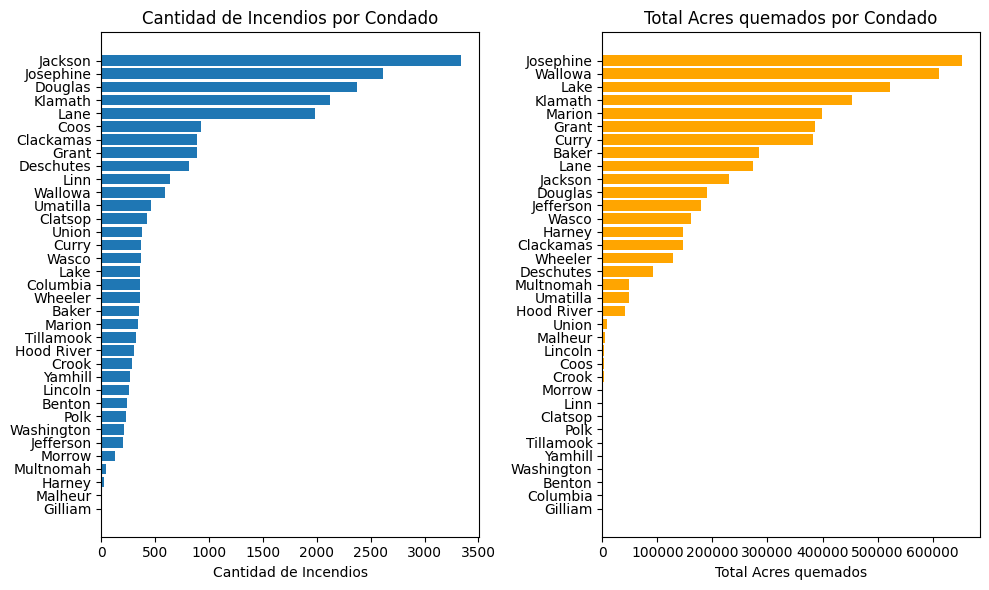

In [78]:
count = df_fire['County'].value_counts().sort_values(ascending=True)
acres_burned = df_fire.groupby('County')['EstTotalAcres'].sum().sort_values(ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.barh(count.index, count.values)
ax1.set_title('Cantidad de Incendios por Condado')
ax1.set_xlabel('Cantidad de Incendios')

ax2.barh(acres_burned.index, acres_burned.values, color='orange')
ax2.set_title('Total Acres quemados por Condado')
ax2.set_xlabel('Total Acres quemados')

plt.tight_layout()
plt.show()

Con estos graficos surge la idea de crear un DataFrame para los condados principales. Consideramos los condados más afectados según la frecuencia y gravedad de los incendios forestales. Más de la mitad de todos los incendios y acres quemados ocurren en estos condados.


In [79]:
top_county = df_fire[df_fire['County'].isin(['Jackson', 'Josephine','Klamath', 'Douglas', 'Lane', 'Wallowa', 'Lake', 'Marion'])]
top_county_weather = df_clima[df_clima['County'].isin(['Jackson', 'Josephine','Klamath', 'Douglas', 'Lane', 'Wallowa', 'Lake', 'Marion'])]

¿Qué factores influyen en la frecuencia y gravedad de los incendios forestales entre los condados más afectados en Oregón? ¿Son los seres humanos responsables del aumento en la frecuencia y gravedad de los incendios forestales, o se debe a causas naturales (rayos)?

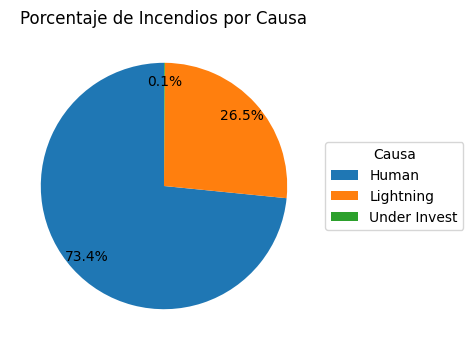

In [80]:
# Contar la cantidad de incendios por causa
counts = top_county['HumanOrLightning'].value_counts()

# Crear un gráfico de torta para la cantidad de incendios por causa
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.85)
plt.title('Porcentaje de Incendios por Causa')

# Mostrar la leyenda fuera del gráfico
plt.legend(counts.index, title='Causa', bbox_to_anchor=(1, 0.5), loc="center left")

# Mostrar el gráfico
plt.show()

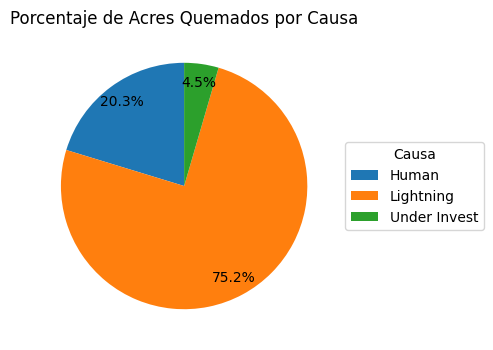

In [81]:
# Gráfico de torta para mostrar la cantidad de acres quemados por cada causa
plt.figure(figsize=(4, 4))
plt.pie(top_county.groupby('HumanOrLightning')['EstTotalAcres'].sum(), labels=None, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.85)
plt.title('Porcentaje de Acres Quemados por Causa')

# Mostrar la leyenda fuera del gráfico
plt.legend(top_county['HumanOrLightning'].unique(), title='Causa', bbox_to_anchor=(1, 0.5), loc="center left")

plt.show()

Los seres humanos fueron responsables del 73% de todos los incendios forestales en Oregón en los condados más afectados durante 2000-2022. A pesar de ser menos frecuentes, los incendios causados por rayos fueron responsables del 75% del total de acres quemados, lo que los hace más graves e impactantes en el paisaje.

Ahora examinemos qué causas antrópicas específicas contribuyen a la frecuencia de incendios forestales en los condados más afectados.

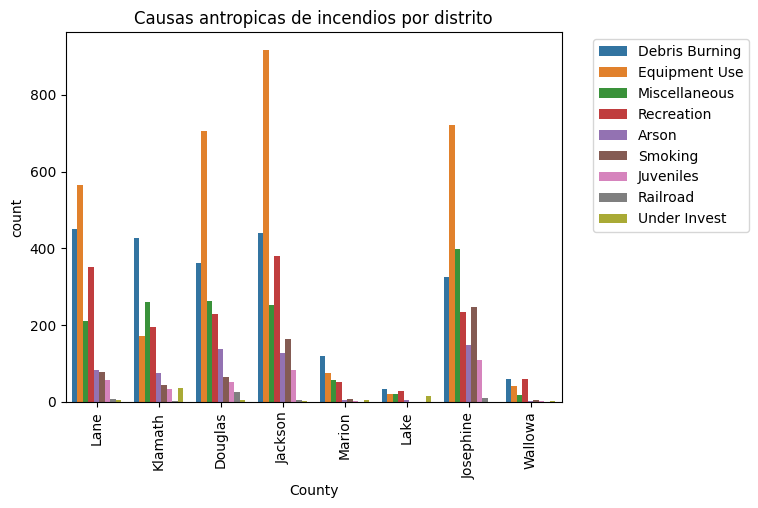

In [82]:
human_caused_general = top_county[top_county['GeneralCause']!= 'Lightning']#Excluir a los rayos de las causas generales
human_caused_general = top_county[top_county['GeneralCause']!= 'Lightning']

sns.countplot(data=human_caused_general, x='County', hue='GeneralCause')
plt.title('Causas antropicas de incendios por distrito')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotar los nombres de los distritos verticalmente en el eje x
plt.xticks(rotation=90, ha='center')
plt.show()

Si bien la predominancia de las causas varia entre distrito y distrito, es claro que las más frecuentes son el uso o mal uso de equipos, la quema de desechos o restos de vegetación y las actividades derivadas de la recreación (como acampar, hacer fogatas, pescar, cocinar u otras actividades al aire libre que implican el uso del fuego). Son dos actividades que con un correcto control deberían poder minimizarse.

Ahora, desglosemos las causas en grupos más específicos.

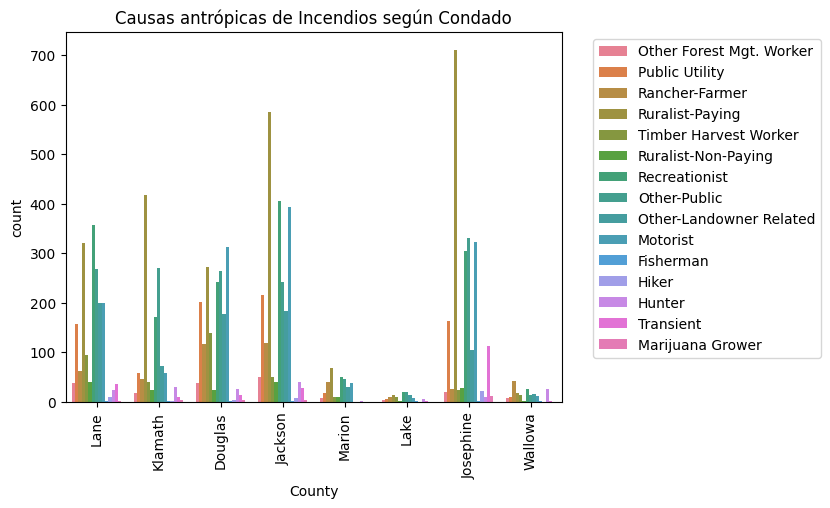

In [83]:
#Eventos de incendios por causa más específica agrupados por condado más afectado
#Excluir nuevamente a los rayos de las causas a analizar
human_caused_specific = top_county[top_county['CauseBy']!= 'Lightning']

sns.countplot(data=human_caused_specific, x='County', hue='CauseBy')
plt.title('Causas antrópicas de Incendios según Condado')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotar los nombres de los distritos verticalmente en el eje x
plt.xticks(rotation=90, ha='center')
plt.show()

Al profundizar en la causa de los incendios forestales relacionados con actividades humanas, se revela que el grupo de "Ruralist-Paying" (propietarios de pequeñas propiedades que pagan tasas para patrullar los bosques) representa el porcentaje más alto (17%) de incendios forestales causados por humanos, seguido por los "Recreationist" (12.5%), que suelen dejar fogatas sin supervisión.

Cabe señalar que la frecuencia de incendios es menor en Marion, Lake y Wallowa, sin embargo, estos condados aún se consideran altamente afectados debido a su historial de incendios grandes o más severos.

*A partir de este punto nos planteamos comenzar a explorar cómo los factores meteorológicos (temperatura promedio y precipitación) influyen en la frecuencia y gravedad de los incendios forestales.*



In [84]:
#Condados mas afectados
#Colocamos la columna año como índice
top_county_weather.loc[:, 'year'] = top_county_weather.index.year
top_county_weather.head()
#Calculamos la temperatura promedio por año para los condados más afectados
tavg_group = top_county_weather.groupby('year')['tavg'].mean()
tavg_group = pd.DataFrame(tavg_group)
print(type(tavg_group))
#Calculamos la precipitación promedio por año para los condados más afectados
grouped = top_county_weather.groupby('year')['prcp'].mean()
# Convertir la Serie en DataFrame
grouped_df = grouped.reset_index()


#Todos los condados
#Calculamos la temperatura promedio por año para todos los condados
tavg_group_all = df_clima.groupby('Year')['tavg'].mean()
tavg_group_all = pd.DataFrame(tavg_group_all)

#Calculamos la precipitación promedio por año para todos los condados
grouped_all = df_clima.groupby('Year')['prcp'].mean()
# Convertir la Serie en DataFrame
grouped_all_df = grouped_all.reset_index()




<class 'pandas.core.frame.DataFrame'>


<ipython-input-84-9eb9bbcdb667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_county_weather.loc[:, 'year'] = top_county_weather.index.year


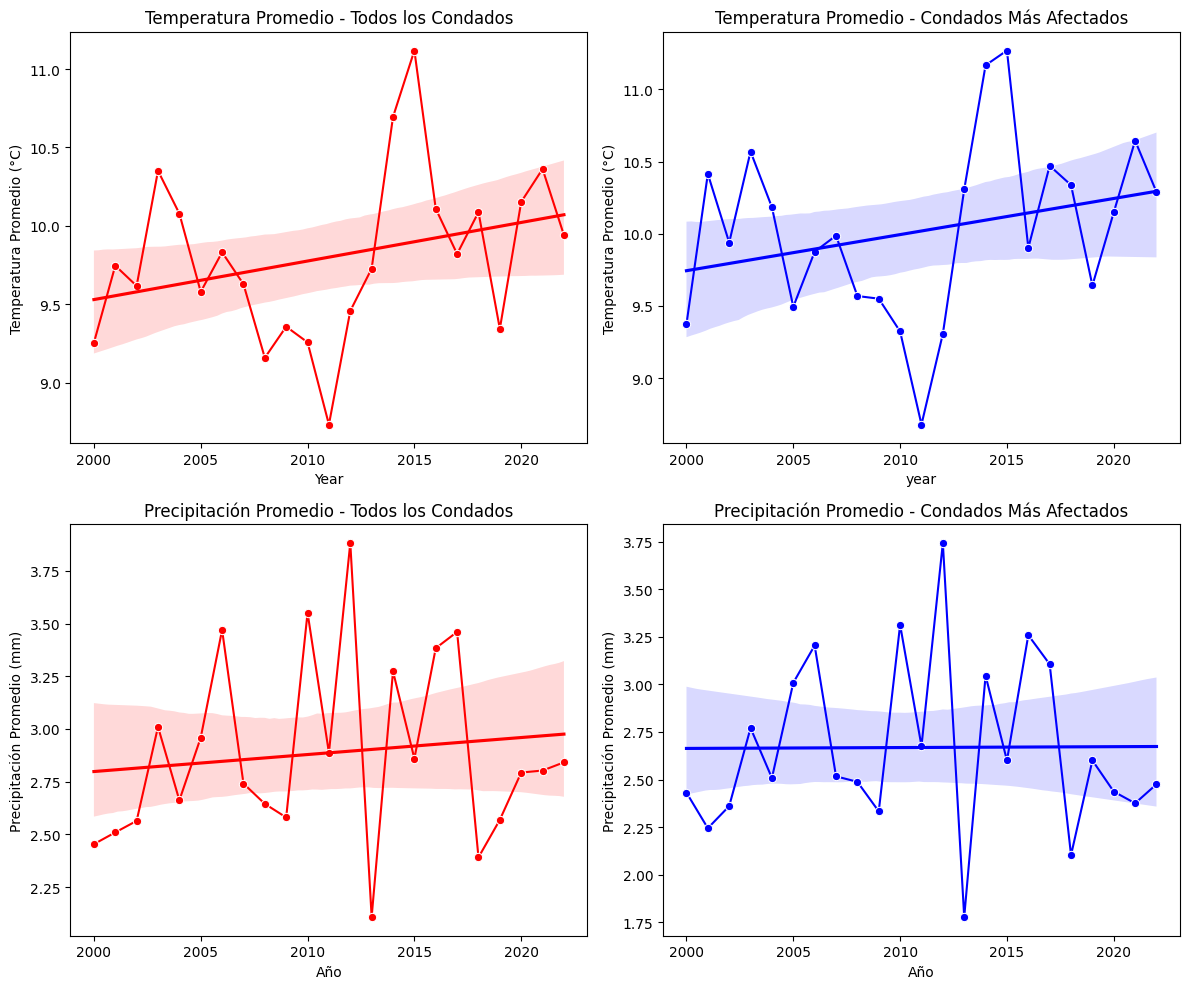

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resetear el índice para los DataFrames de precipitación
grouped_all_df = grouped_all_df.reset_index()
grouped_df = grouped_df.reset_index()

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de temperatura promedio para todos los condados con línea de tendencia
sns.lineplot(data=tavg_group_all, x=tavg_group_all.index, y='tavg', color='red', marker='o', ax=axes[0, 0])
sns.regplot(data=tavg_group_all, x=tavg_group_all.index, y='tavg', color='red', scatter=False, ax=axes[0, 0])
axes[0, 0].set_ylabel('Temperatura Promedio (°C)')
axes[0, 0].set_title('Temperatura Promedio - Todos los Condados')

# Gráfico de temperatura promedio para los condados más afectados con línea de tendencia
sns.lineplot(data=tavg_group, x=tavg_group.index, y='tavg', color='blue', marker='o', ax=axes[0, 1])
sns.regplot(data=tavg_group, x=tavg_group.index, y='tavg', color='blue', scatter=False, ax=axes[0, 1])
axes[0, 1].set_ylabel('Temperatura Promedio (°C)')
axes[0, 1].set_title('Temperatura Promedio - Condados Más Afectados')

# Gráfico de precipitación promedio para todos los condados con línea de tendencia
sns.lineplot(data=grouped_all_df, x='Year', y='prcp', color='red', marker='o', ax=axes[1, 0])
sns.regplot(data=grouped_all_df, x='Year', y='prcp', color='red', scatter=False, ax=axes[1, 0])
axes[1, 0].set_ylabel('Precipitación Promedio (mm)')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_title('Precipitación Promedio - Todos los Condados')

# Gráfico de precipitación promedio para los condados más afectados con línea de tendencia
sns.lineplot(data=grouped_df, x='year', y='prcp', color='blue', marker='o', ax=axes[1, 1])
sns.regplot(data=grouped_df, x='year', y='prcp', color='blue', scatter=False, ax=axes[1, 1])
axes[1, 1].set_ylabel('Precipitación Promedio (mm)')
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_title('Precipitación Promedio - Condados Más Afectados')

plt.tight_layout()
plt.show()

La temperatura promedio en los condados más afectados parece aumentar levemente con el tiempo, y la precipitación promedio parece disminuir ligeramente en comparación con todos los condados, lo que indica que los condados afectados por incendios forestales están volviéndose más cálidos y secos. Igualmente estas tendencias no son estadísticamente significativas, por lo tanto, necesitaríamos considerar variables adicionales para comprender mejor la relación.

In [86]:
df_clima.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309512 entries, 2000-01-01 to 2022-12-31
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   County                  309512 non-null  object        
 1   tmax                    309512 non-null  float64       
 2   tmin                    309512 non-null  float64       
 3   tavg                    309512 non-null  float64       
 4   prcp                    309512 non-null  float64       
 5   Year                    309512 non-null  int64         
 6   Serial                  23472 non-null   float64       
 7   FireCategory            23472 non-null   object        
 8   Area                    23472 non-null   object        
 9   DistrictName            23472 non-null   object        
 10  UnitName                23472 non-null   object        
 11  FullFireNumber          23472 non-null   object        
 12  FireName      

In [87]:
# Lista de columnas que quieres eliminar
columnas_a_eliminar = ['FireDuration_hrs','Area', 'EstTotalAcres', 'Protected_Acres', 'HumanOrLightning', 'Lat_DD', 'Long_DD', 'ReportDateTime', 'DistrictCode', 'UnitCode', 'Serial', 'Cause_Comments', 'LandmarkLocation', 'Twn', 'Discover_DateTime',
                                'RegUseRestriction', 'Ign_DateTime', 'CreationDate', 'ModifiedDate', 'UnitName','FireCategory','DistrictName','FullFireNumber','FireName','Size_class','CauseBy','GeneralCause','SpecificCause','LatLongDD','FO_LandOwnType','Rng','Subdiv','RegUseZone','Industrial_Restriction','DistFireNumber','Control_DateTime','Sec']

# Crear un nuevo DataFrame eliminando las columnas especificadas
df_reg = df_clima.drop(columnas_a_eliminar, axis=1)
df_reg.head()

,County,tmax,tmin,tavg,prcp,Year,FireEvent,April,August,December,...,June,March,May,November,October,September,Winter,Spring,Summer,Fall
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
#Transformar variable object
encode_county = pd.get_dummies(df_reg['County'], drop_first=True)

In [89]:
#Check valores faltantes
check_missing = df_reg.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)
check_missing

County       0.0
tmax         0.0
tmin         0.0
tavg         0.0
prcp         0.0
Year         0.0
FireEvent    0.0
April        0.0
August       0.0
December     0.0
February     0.0
January      0.0
July         0.0
June         0.0
March        0.0
May          0.0
November     0.0
October      0.0
September    0.0
Winter       0.0
Spring       0.0
Summer       0.0
Fall         0.0
dtype: float64

In [90]:
df_reg.head()

,County,tmax,tmin,tavg,prcp,Year,FireEvent,April,August,December,...,June,March,May,November,October,September,Winter,Spring,Summer,Fall
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Análisis de correlación y regresión ¿Existe una fuerte correlación entre el clima (temperatura y precipitación) y la ocurrencia de incendios forestales? ¿Existen variables que podamos utilizar o ingeniar para ayudarnos a crear un sistema de alarma para predecir cuándo es alto el riesgo de incendio forestal?

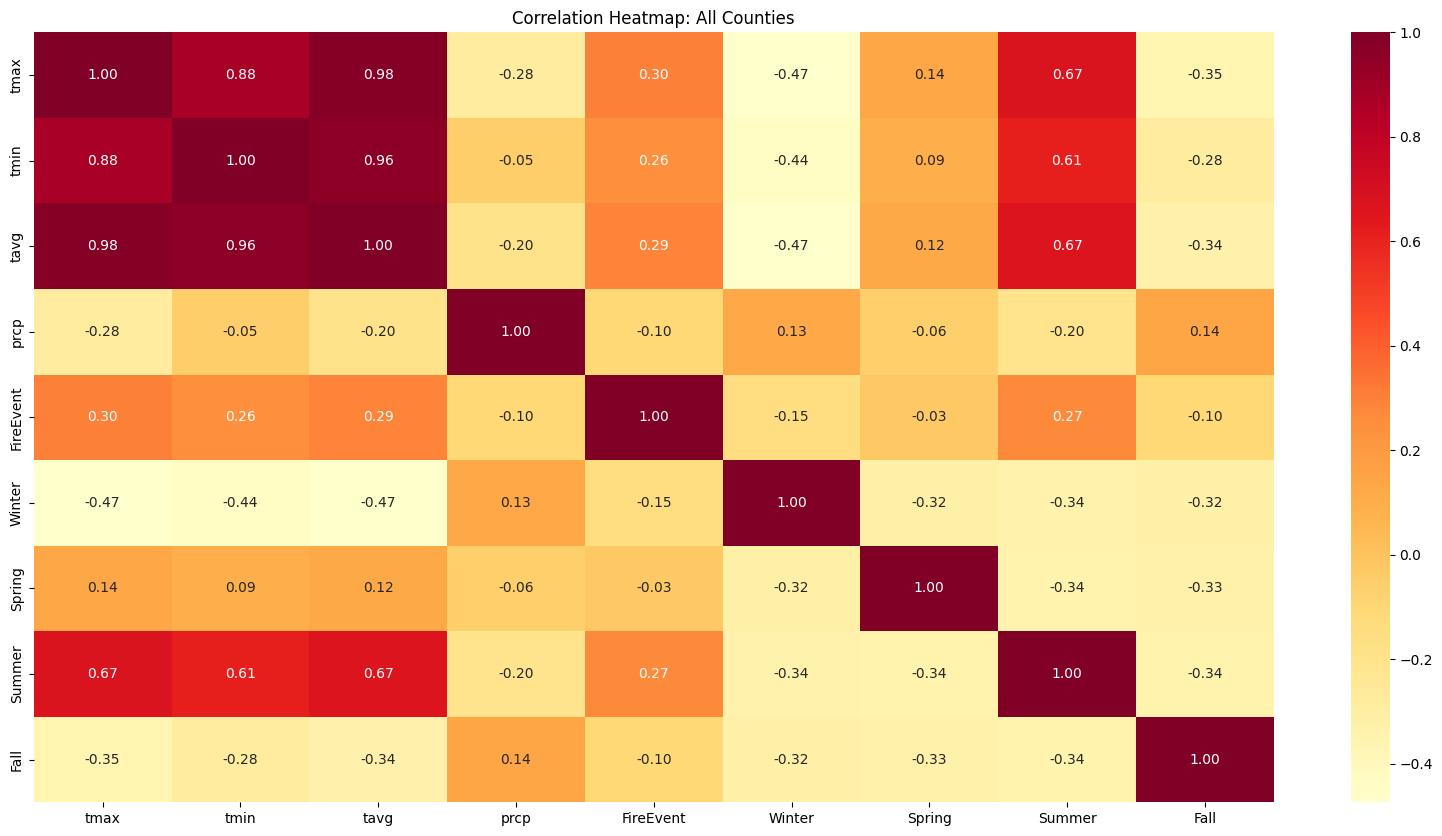

In [91]:
#Examinar la fuerza y dirección de la correlación de las variables con los incendios forestales

plt.figure(figsize=(20,10))

variable_list = df_reg[['tmax', 'tmin', 'tavg', 'prcp','FireEvent','Winter', 'Spring', 'Summer', 'Fall']]

corr_matrix = variable_list.corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Heatmap: All Counties')

plt.show()

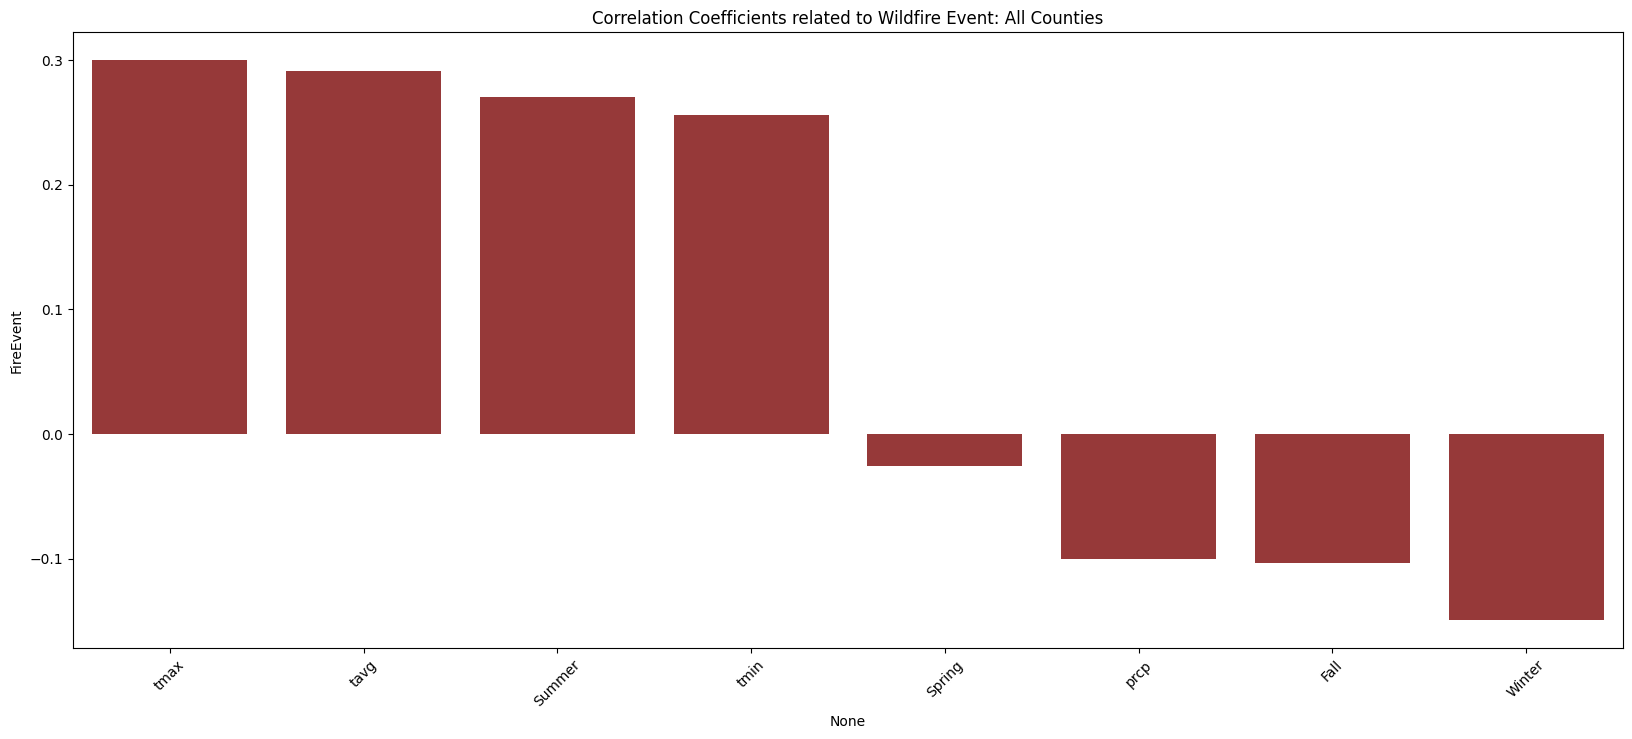

In [92]:
#Creamos un gráfico de barras para ayudarnos a visualizar las diferencias de correlación

corr_all_counties = corr_matrix.loc[:,['FireEvent']]
corr_all_counties = corr_all_counties.sort_values(by ='FireEvent', ascending=False).drop('FireEvent')

plt.figure(figsize=(20,8))
sns.barplot(data=corr_all_counties, x = corr_all_counties.index, y = 'FireEvent', color='brown')
plt.title("Correlation Coefficients related to Wildfire Event: All Counties")
plt.xticks(rotation= 45)
plt.plot
plt.show()

In [93]:
columnas_a_excluir = ['County','April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'FireEvent']

X = df_reg.drop(columnas_a_excluir, axis=1)

Y = df_reg['FireEvent']

In [94]:
X

,tmax,tmin,tavg,prcp,Year,Winter,Spring,Summer,Fall
Date,,,,,,,,,
2000-01-01,-1.68,-8.74,-5.21,0.33,2000,1,0,0,0
2000-01-01,5.54,0.59,3.06,8.33,2000,1,0,0,0
2000-01-01,4.24,0.33,2.28,5.88,2000,1,0,0,0
2000-01-01,6.86,2.49,4.68,18.26,2000,1,0,0,0
2000-01-01,5.12,1.81,3.47,11.51,2000,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-12-31,2.45,-3.45,-0.50,7.34,2022,0,0,0,1
2022-12-31,6.39,0.11,3.25,5.85,2022,0,0,0,1
2022-12-31,9.06,4.44,6.75,5.70,2022,0,0,0,1


In [95]:
Y

Date
2000-01-01    0
2000-01-01    0
2000-01-01    0
2000-01-01    0
2000-01-01    0
             ..
2022-12-31    0
2022-12-31    0
2022-12-31    0
2022-12-31    0
2022-12-31    0
Name: FireEvent, Length: 309512, dtype: int64

In [96]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [97]:
forward_selection(X,Y)

<ipython-input-96-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-96-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-96-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-96-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-96-a6

['tavg', 'tmax', 'Spring', 'Summer', 'Winter', 'Fall', 'Year', 'prcp']


No sorprende ver una correlación positiva significativa entre los eventos de incendios forestales y la temperatura y el verano, mientras que hay una correlación negativa con el invierno, el otoño y la precipitación.

Ahora nos centraremos en las dos variables climáticas que muestran una correlación fuerte con la ocurrencia de incendios forestales a lo largo del tiempo.

Específicamente, investigaremos la fuerza de la correlación entre el número de incendios forestales y dos factores: la precipitación media y la temperatura.

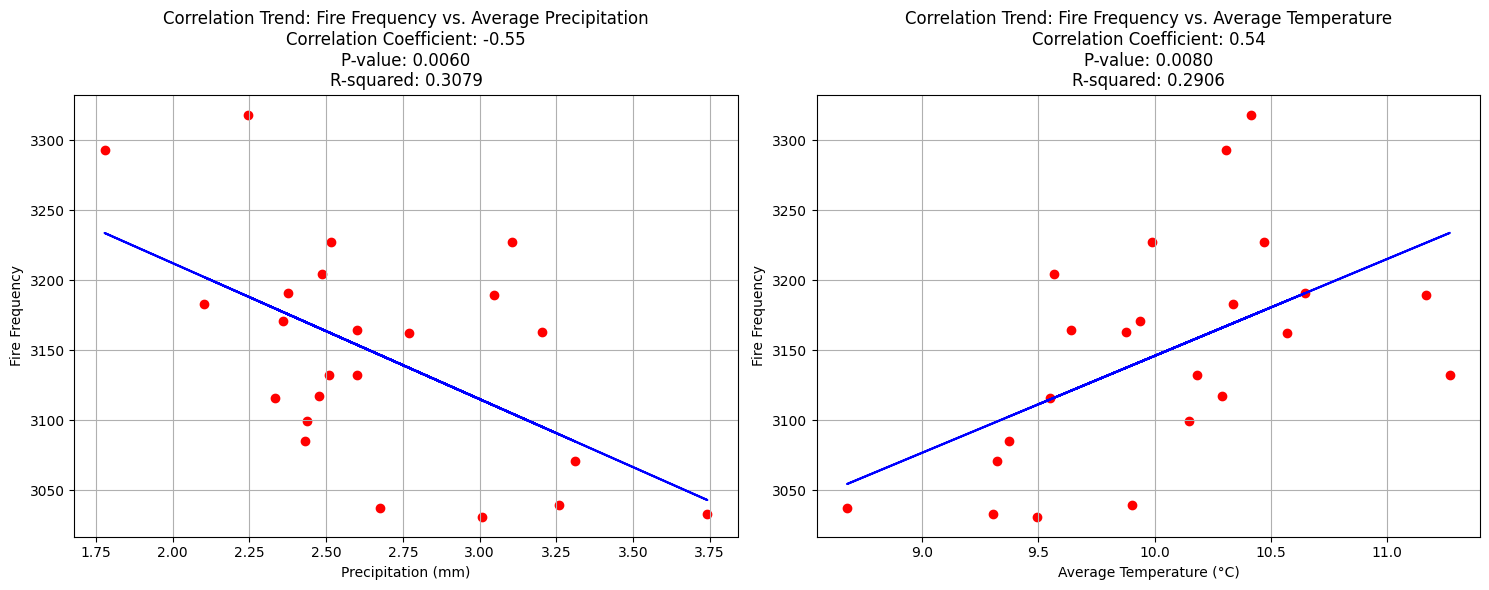

In [98]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

#Examinar la correlación entre los condados más afectados y la precipitación

prcp_mean = top_county_weather.groupby('Year')['prcp'].mean()
fires_per_year = top_county_weather.groupby('Year').size()

#Calcular el coeficiente de correlación
corr_coeff = np.corrcoef(prcp_mean, fires_per_year)[0, 1]

#Regresión lineal
regression_line = np.polyfit(prcp_mean, fires_per_year, 1)
line = regression_line[0] * prcp_mean + regression_line[1]

#Calcular el p-value y R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(prcp_mean, fires_per_year)

#Grafico
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(prcp_mean, fires_per_year, color='r')
plt.plot(prcp_mean, line, color='b')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Fire Frequency')
plt.title('Correlation Trend: Fire Frequency vs. Average Precipitation\n'
          f'Correlation Coefficient: {corr_coeff:.2f}\n'
          f'P-value: {p_value:.4f}\n'
          f'R-squared: {r_value**2:.4f}')
plt.grid(True)

#Examinar la correlación entre los condados mas afectados y la temperatura
temp_avg = top_county_weather.groupby('Year')['tavg'].mean()
fires_per_year = top_county_weather.groupby('Year').size()

#Calcular el coeficiente de correlación
corr_coeff = np.corrcoef(temp_avg, fires_per_year)[0, 1]

#Regresion lineal
regression_line = np.polyfit(temp_avg, fires_per_year, 1)
line = regression_line[0] * temp_avg + regression_line[1]

#Calcular el p-value y R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_avg, fires_per_year)

#Gráfico
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(temp_avg, fires_per_year, color='r')
plt.plot(temp_avg, line, color='b')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Fire Frequency')
plt.title('Correlation Trend: Fire Frequency vs. Average Temperature\n'
          f'Correlation Coefficient: {corr_coeff:.2f}\n'
          f'P-value: {p_value:.4f}\n'
          f'R-squared: {r_value**2:.4f}')
plt.grid(True)

plt.tight_layout()  #Para ajustar espacio entre graficos
plt.show()


Los resultados anteriores indican que tanto la temperatura como la precipitación muestran una correlación estadísticamente significativa y fuerte con la severidad y frecuencia de los incendios al examinar los condados más afectados.

*Crear y Entrenar un Modelo de Regresión Logística*

La regresión logística es un tipo de análisis de clasificación utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores.

Primero dividiremos los datos en variables de training y test, para que no estemos evaluando nuestro modelo con los mismos datos en los que fue entrenado.

Posteriormente intentaremos desarrollar un modelo para predecir el riesgo de incendios forestales considerando tres categorías:
1. Sin Riesgo.
2. Riesgo Moderado.
3. Riesgo Extremo.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Identificamos la variable independiente y la variable dependiente, respectivamente
x = pd.concat([encode_county, df_reg[['tavg', 'prcp']]], axis=1)

y = df_reg['FireEvent']


#Dividir los datos en conjuntos de entrenamiento y prueba.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

#Ajustar el modelo con los datos de entrenamiento.
model = LogisticRegression(max_iter=100, solver='saga', random_state=33).fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [100]:
#Realizar predicciones sobre los datos de prueba.

y_pred = model.predict(x_test)

#Evaluar el rendimiento del modelo.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9322326866226193
Precision: 0.6287762416794674
Recall: 0.2613878246062154
F1 Score: 0.36926777928131105


Si bien una precisión del modelo del 93% es bastante buena, es importante tener en cuenta que los datos están desbalanceados, con solo alrededor del 7% de las ocurrencias que involucran incendios forestales. Este desequilibrio puede llevar al modelo a predecir predominantemente la ausencia de eventos de incendios forestales. La métrica clave a considerar es 'Recall', que representa la predicción correcta de incendios forestales. El bajo puntaje de recall del 27% indica que el modelo no detecta la mayoría de los eventos de incendios forestales, lo que lo hace relativamente débil para esta tarea (cometiendo un Error de Tipo II). Este resultado no es sorprendente, ya que la ocurrencia de incendios forestales depende de muchos factores, incluidos el viento promedio, la humedad y el tipo de combustible, que no están incluidos en los datos actuales. Para mejorar el modelo, sería necesario contar con datos adicionales sobre estas variables.

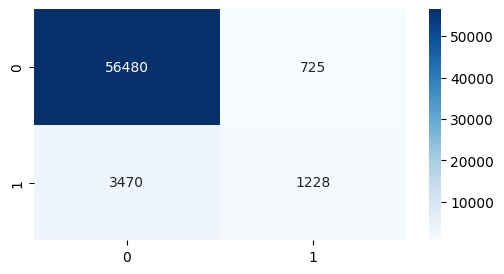

In [101]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
plt.figure(figsize=(6, 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.show()

Arriba, podemos ver que el modelo se desempeña bien al predecir la clase mayoritaria (sin eventos de incendios forestales), aunque tiene dificultades para identificar casos positivos (eventos de incendios forestales). Está claro que necesitaríamos más datos y ajustes en el modelo para mejorar nuestra sensibilidad en la predicción de eventos de incendios forestales.

In [102]:
#Crear clasificaciones de riesgo para alertar cuando hay un alto riesgo de eventos de incendios forestales.

# Get predictions and probabilities
predictions = model.predict(x)
probs = model.predict_proba(x)

#Obtener predicciones y probabilidades.
risk_levels = []
for prob in probs:
    if prob[1] < 0.25:
        risk_levels.append('Low Risk')
    elif prob[1] >= 0.25 and prob[1] < 0.5:
        risk_levels.append('Moderate Risk')
    elif prob[1] >= 0.5 and prob[1] < 0.85:
        risk_levels.append('High Risk')
    else:
        risk_levels.append('Extreme Risk')

#Agregar los niveles de riesgo al dataframe.
df_reg['Risk_Level'] = risk_levels
df_reg.head()

,County,tmax,tmin,tavg,prcp,Year,FireEvent,April,August,December,...,March,May,November,October,September,Winter,Spring,Summer,Fall,Risk_Level
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Low Risk
2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Low Risk
2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Low Risk
2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Low Risk
2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Low Risk


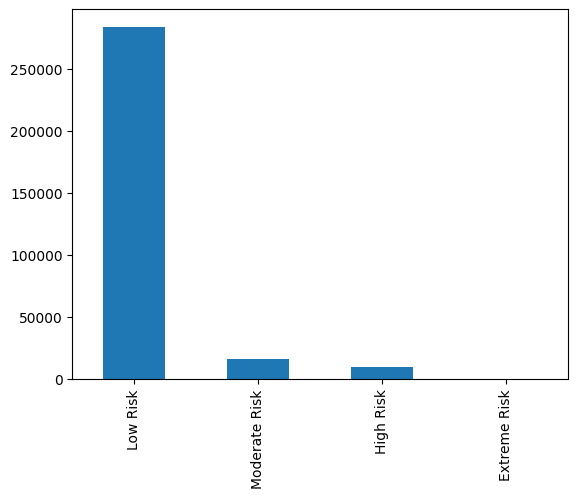

In [103]:
df_reg['Risk_Level'].value_counts().plot(kind='bar')
plt.show()

Evaluación del Modelo.

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluación del rendimiento del modelo en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Evaluación del rendimiento del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Comparación de métricas de rendimiento
print("Métricas de rendimiento en el conjunto de entrenamiento:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("\n")

print("Métricas de rendimiento en el conjunto de prueba:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Métricas de rendimiento en el conjunto de entrenamiento:
Accuracy: 0.9329305477587648
Precision: 0.6396802887714322
Recall: 0.26430169383189517
F1 Score: 0.37405299461007874


Métricas de rendimiento en el conjunto de prueba:
Accuracy: 0.9322326866226193
Precision: 0.6287762416794674
Recall: 0.2613878246062154
F1 Score: 0.36926777928131105


El rendimiento del modelo en el conjunto de entrenamiento y prueba es bajo (se mantiene una buena precisión pero tenemos recall y F1-score malos en ambos conjuntos), esto sugiere que el modelo podría estar subajustando los datos. En otras palabras, el modelo no está capturando adecuadamente la relación subyacente entre las características y las etiquetas de destino. Para abordar el underfitting, deberíamos aumentar la complejidad del modelo, agregar más características relevantes, ajustar los hiperparámetros del modelo, o utilizar un modelo más complejo.

